<a href="https://colab.research.google.com/github/Ali-Fartout/Kaggle/blob/main/Tweet_Sentiment_Extraction/Tweet_Sentiment_Extraction_EDA_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirement

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd

/content


In [ ]:
!kaggle competitions download -c tweet-sentiment-extraction

tweet-sentiment-extraction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/tweet-sentiment-extraction.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

# First look

In [ ]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

## Check 'value_counts', shape & overview

In [ ]:
train_data.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


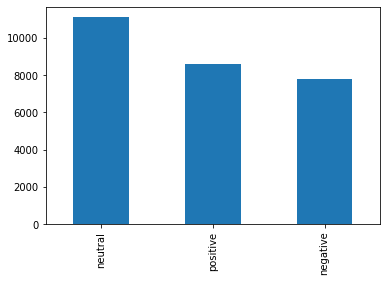

In [ ]:
train_data['sentiment'].value_counts().plot(kind='bar')

## Check Nan Value

In [ ]:
rowsWithNans = [index for index, row in train_data.iterrows() if row.isnull().any()]

In [ ]:
train_data.iloc[rowsWithNans]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


## Check Duplicated data

In [ ]:
train_data[train_data.duplicated(['selected_text'], keep=False)].sort_values(by=['selected_text'])

,textID,text,selected_text,sentiment
17300,0879b2ef8e,Webcams Hoepfner Burgfest in #Karlsruhe: Autom...,#fail,negative
10532,4d40befe26,new guitar hero metallica guitar is already br...,#fail,negative
2941,da83070320,#itsucks when everyone but the one i want to t...,#itsucks,negative
17419,04b6ddc2da,_2890 Nt able to follow anyone friendorfollow...,#itsucks,negative
8719,b02f4018dc,Nt able to follow anyone friendorfollow.com h...,#itsucks,negative
...,...,...,...,...
16444,7972343be5,Loves fatty take away nights... yummy then co...,yummy,positive
9536,368ed51322,"Cooking microwave pizzas, yummy",yummy,positive
24883,5bfad683d5,yummy curry save me some please lol,yummy,positive
20247,ab92aa95b3,about to drink a hot chocolate yummy.,yummy.,positive


In [ ]:
train_data[train_data.duplicated(['text'], keep=False)].sort_values(by=['text'])

,textID,text,selected_text,sentiment


In [ ]:
dict(train_data['selected_text'].value_counts())


{'good': 199,
 'love': 185,
 'Happy': 163,
 'miss': 143,
 'happy': 106,
 'thanks': 98,
 'great': 91,
 'sad': 89,
 'sorry': 82,
 'Thanks': 82,
 'hate': 70,
 'fun': 69,
 'nice': 64,
 'bad': 63,
 '****': 63,
 'Good': 59,
 'hope': 57,
 'wish': 55,
 'awesome': 52,
 'best': 44,
 'tired': 44,
 'sick': 43,
 'excited': 40,
 'like': 39,
 'glad': 37,
 'hurts': 36,
 'missed': 34,
 'HAPPY': 34,
 'sucks': 34,
 'Love': 33,
 'amazing': 32,
 'Sorry': 31,
 'missing': 31,
 'lost': 29,
 'Happy Mother`s Day': 28,
 'better': 27,
 'bored': 26,
 'cool': 26,
 'headache': 25,
 'stupid': 23,
 'enjoy': 23,
 'beautiful': 21,
 'sadly': 20,
 'hopefully': 20,
 'boring': 20,
 'loves': 19,
 'cute': 19,
 'lovely': 19,
 'Hope': 19,
 'Great': 19,
 'I love': 19,
 'Thank': 18,
 'good.': 18,
 'Thanks!': 17,
 'hard': 17,
 'Goodnight': 17,
 'poor': 16,
 'awesome.': 16,
 'awesome!': 16,
 'sad.': 16,
 'stuck': 16,
 'Sad': 15,
 'forgot': 15,
 'favorite': 15,
 'wonderful': 15,
 'thank': 15,
 'i love': 15,
 'tired.': 14,
 'sucks.':

## Check text randomly

In [ ]:
for _ in range(3):
  randNum = random.randint(0,train_data.shape[0])
  print(train_data.iloc[randNum,1],' ---> ',train_data.iloc[randNum,2])
  print('-------------------------------------')

Its so obvious Holly will go thru on the public vote straight away.. SOOO obvious.  Then Aidan and Greg for judges but neither should go  --->  Its so obvious Holly will go thru on the public vote straight away.. SOOO obvious.  Then Aidan and Greg for judges but neither should go
-------------------------------------
today was a lovely day! I had fun with  and  this evening!  --->  lovely
-------------------------------------
Making an iMovie of college  --->  Making an iMovie of college
-------------------------------------


# Preprocessing

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Testing nltk 
stopWords = nltk.corpus.stopwords.words('english')
len(stopWords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


179

In [ ]:
# Make a fucntion for convert Upper letter to lower letter
def UpperToLower(text):
    noUpperCase = [words.lower() for words in text]
    return ''.join(noUpperCase)

In [ ]:
import string 

# Create a function for removing punctuation
def RemovePunctaution(text):
    noPunctaution = [words for words in text if words not in string.punctuation]
    return ''.join(noPunctaution)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

def Lemmatizer(vector):
  lemmatizer = WordNetLemmatizer()
  lemmatizeWords = [lemmatizer.lemmatize(word) for word in vector]
  return lemmatizeWords

In [ ]:
# Create a Function for removing stop word

def RemoveStopWords(text):
  stopWords = nltk.corpus.stopwords.words('english')
  noStopWords = [word for word in text if word not in stopWords]
  return noStopWords

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

def Tokening(string):
  tokens = word_tokenize(string)
  return tokens

In [ ]:
def ConvertArrayToText(vector):
  return ' '.join(vector)

In [ ]:
def RemoveEmojis(text):

  emojiPatterns = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  return emojiPatterns.sub(r'', text) # no emoji

In [ ]:
def DataEqualTarget(vector):
  size = len(vector)
  for x in range(size):
    if vector.iloc[x,1] == vector.iloc[x,2]:
      vector.iloc[x,2] = 'Equal'
  return vector

In [ ]:
def EncodeSentimant(text):
  if text == 'positive':
      return 1
  elif text == 'negative':
      return -1
  elif text == 'neutral':
      return 0
  else:
    return None

In [ ]:
words = set(nltk.corpus.words.words())

def RemoveNoenSenseWord(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) \
     if w.lower() in words or not w.isalpha())

In [ ]:
train_data = train_data.drop(index=rowsWithNans)


train_data['text'] = (train_data['text']
              .apply(lambda x : re.sub(r"http\S+", '', x))
              .apply(lambda x : re.sub(r"WWW\.\S+", '', x))
              .apply(lambda x : re.sub(r"www\.\S+", '', x))
              .apply(lambda x : re.sub(r"\*{4}", 'BAD_WORD', x))
              .apply(lambda x : re.sub(r"\*{3}", 'BAD_WORD', x))
              .apply(lambda x : RemoveEmojis(x))
              .apply(lambda x : RemovePunctaution(x))
              .apply(lambda x : UpperToLower(x))
              .apply(lambda x : Tokening(x))
              .apply(lambda x : RemoveStopWords(x))
              .apply(lambda x : Lemmatizer(x))
              .apply(lambda x : ConvertArrayToText(x))


)


train_data['selected_text'] = (train_data['selected_text']
              .apply(lambda x : re.sub(r"http\S+", '', x))
              .apply(lambda x : re.sub(r"WWW\.\S+", '', x))
              .apply(lambda x : re.sub(r"www\.\S+", '', x))
              .apply(lambda x : re.sub(r"\*{4}", 'BAD_WORD', x))
              .apply(lambda x : re.sub(r"\*{3}", 'BAD_WORD', x))
              .apply(lambda x : RemoveEmojis(x))
              .apply(lambda x : RemovePunctaution(x))
              .apply(lambda x : UpperToLower(x))
              .apply(lambda x : Tokening(x))
              .apply(lambda x : RemoveStopWords(x))
              .apply(lambda x : Lemmatizer(x))
              .apply(lambda x : ConvertArrayToText(x))
              
              
)


test_data['text'] = (test_data['text']
              .apply(lambda x : re.sub(r"http\S+", '', x))
              .apply(lambda x : re.sub(r"WWW\.\S+", '', x))
              .apply(lambda x : re.sub(r"www\.\S+", '', x))
              .apply(lambda x : re.sub(r"\*{4}", 'BAD_WORD', x))
              .apply(lambda x : re.sub(r"\*{3}", 'BAD_WORD', x))
              .apply(lambda x : RemoveEmojis(x))
              .apply(lambda x : RemovePunctaution(x))
              .apply(lambda x : UpperToLower(x))
              .apply(lambda x : Tokening(x))
              .apply(lambda x : RemoveStopWords(x))
              .apply(lambda x : Lemmatizer(x))
              .apply(lambda x : ConvertArrayToText(x))



)

train_data['sentiment'] = train_data['sentiment'].apply(lambda x: EncodeSentimant(x))
test_data['sentiment'] = test_data['sentiment'].apply(lambda x: EncodeSentimant(x))


train_data = DataEqualTarget(train_data)

In [ ]:
for _ in range(3):
  randNum = random.randint(0,train_data.shape[0])
  print(train_data.iloc[randNum,1],' ---> ',train_data.iloc[randNum,2])
  print('-------------------------------------')

dont reply none fan dont know trust  --->  Equal
-------------------------------------
bday im gettin older  --->  Equal
-------------------------------------
beta 5 30 expired today back 221 public release miss already  --->  miss already
-------------------------------------


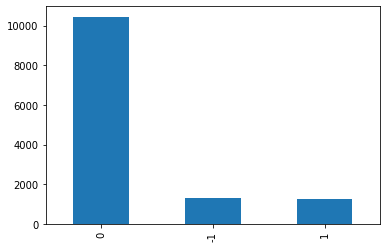

In [ ]:
train_data.sentiment[train_data['selected_text'] == "Equal"].value_counts().plot(kind='bar')

In [ ]:
train_data.sample(20)

,textID,text,selected_text,sentiment
21607,d3e34029fc,hey thanx following ill follow,thanx,1
21587,12c056997e,fight club 10th anniversary reenacting nice ta...,nice,1
22491,3ab12ae6a0,playing cool new website hopefully ready soon,playing cool new website,1
25463,b96300b57e,test seo smo marketing try,Equal,0
21173,d68d8051d8,way work,Equal,0
5344,eee8feb6d5,well least bad thought found new website watch...,bad,-1
12988,7cf11911b0,2229 time,Equal,0
7155,1382e45cda,mcdonalds car,Equal,0
25329,53010c786e,curry shrimp yesterday lol love seafood,love,1
12403,07fd0f3a7b,happy star war day everyone,happy,1


In [ ]:
train_data.to_csv('Train.csv')
test_data.to_csv('Test.csv')